# Laborator 3. Regresia Liniara in Python utilizand Pandas si Scikit-Learn


## Cuprins

1. Selectarea setului de date si .
2. Importarea bibliotecilor si setului de date.
3. Studierea setului de date.
4. Setarea problemei si Pregatirea setului de date pentru antrenare.<br>
   a. Divizare in set de date pentru antrenare si set de date pentru testare. <br>
   b. Utilizarea k-folds cross validation pentru testare.
5. Initializarea modelului de regresie liniara si aplicarea acestuia pe datele noastre.
6. Concluzii.

## Selectarea setului de date
1. Setul de date il veti alege de sine stator din urmatoarele repositorii (important este ca setul de date sa fie compatibil cu rezolvarea problemei de regresie liniara):<br>
   a. https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=&sort=taskDown&view=table <br>
   b. https://www.kaggle.com/rtatman/datasets-for-regression-analysis <br>
   c. https://data.world/datasets/regression <br>
   d. https://www.kdnuggets.com/datasets/index.html
2. Creati un fisier de tip jupyter notebook in aceeasi mapa.

### Cei care nu-si gasesc nimic potrivit pot folosi acelasi dataset folosit anterior (lab. 2).
### Exemplul va fi pe datasetul utilizat in lab. 2.
   

## Importarea bibliotecilor si setului de date

In [91]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

incarcam fisierul .csv intr-un dataframe |
daca la voi nu e csv, incercati mai intai sa-l transformati in csv


In [92]:
data = pd.read_csv('qsar_aquatic_toxicity.csv',header = None,
# nu avem setate numele de coloane | 
# in lab 2 le-am setat direct in fctia read_csv | 
# insa le putem seta si dupa incarcarea fisierului
names = ['TPSA','SAacc','H-050','MLOGP','RDCHI','GATS1p','nN','C-040','quantitativeResponse'])
data

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitativeResponse
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


 This dataset was used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. 

TPSA(Tot) Molecular properties
SAacc     Molecular properties 
H-050     Atom-centred fragments 
MLOGP     Molecular properties 
RDCHI     Connectivity indices 
GATS1p    2D autocorrelations 
nN        Constitutional indices 
C-040     Atom-centred fragments

## Studierea setului de date prin manipularea acestuia

Hai sa vizualizam datele, grafic

# data.plot(figsize=(18, 5)) # figsize este marimea dreptunghiului unde este afisat graficul (latimea si lungimea)

Daca privim mai atent datele putem observa niste lucruri stranii in grafic
1. Se pare ca anumite date lipsesc (acolo unde este sters graficul)
2. Se pare ca avem anomalii in date. (anumite date nu coincid cu valorile de min sau max care le poate lua o coloana)

Pentru a verifica daca nu lipsesc unele valori in setul nostru de date folosim fctia isnull()


In [112]:
data.mean()

TPSA                    48.472930
SAacc                   58.869018
H-050                    0.937729
MLOGP                    2.313493
RDCHI                    2.492299
GATS1p                   1.046264
nN                       1.003663
C-040                    0.353480
quantitativeResponse     4.658421
dtype: float64

Functia a returnat <b> False </b> ceea ce inseamna ca toate datele sunt si nu avem anomalii.

Construim graficele la fiecare coloană pentru a vedea cum sunt distribuite datele.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a103cb0d0>,
      dtype=object)

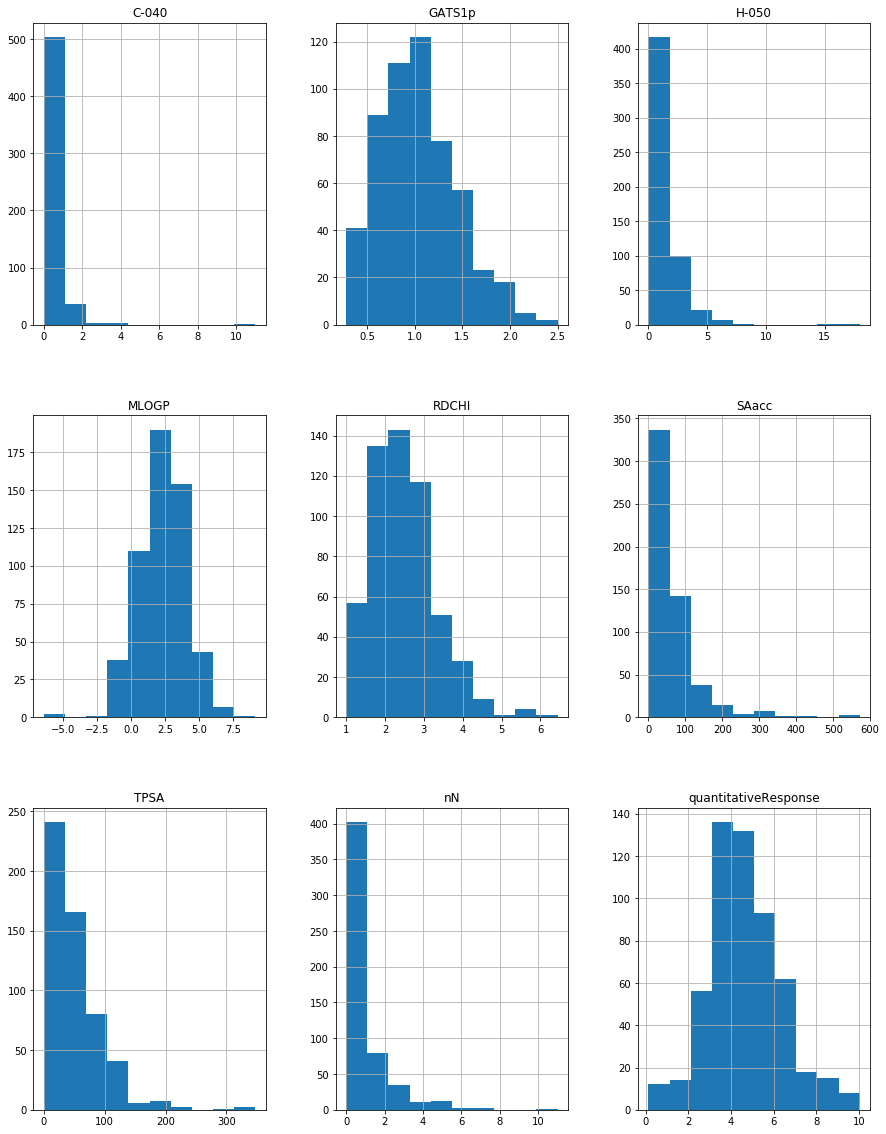

In [94]:
data.hist(figsize = (15,20))

datanew = data[['TPSA','SAacc','H-050','MLOGP','RDCHI','GATS1p','nN','C-040']]

tpsa = datanew['TPSA']
saacc = datanew['SAacc']
h050 = datanew['H-050']
mloggp = datanew['MLOGP']
rdchi = datanew['RDCHI']
gats1p = datanew['GATS1p']
nN = datanew['nN']
c040 = datanew['C-040']
quantitative = data['quantitativeResponse']

# Plot with differently-colored markers.
plt.plot(quantitative, tpsa, 'b-', label='TPSA')
plt.plot(quantitative, saacc, 'g-', label='SAacc')
plt.plot(quantitative, h050, 'y-', label='H-050')
plt.plot(quantitative, mloggp, 'r-', label='MLOGP')
plt.plot(quantitative, rdchi, 'b-', label='RDCHI')
plt.plot(quantitative, gats1p, 'p-', label='GATS1p')
plt.plot(quantitative, nN, 'b-', label='nN')
plt.plot(quantitative, c040, 'g-', label='C-040')


# Create legend.
plt.legend(loc='upper left')
plt.xlabel('quantitativeResponse')
plt.ylabel('GDP per capita ($)')


## Definirea problemei de regresie


Drept urmare, din datele noastre putem lua ca si o caracteristica din observarile anterioare pentru variabila independenta x - coloana "An", iar drept raspuns variabila dependenta y - coloana "PretMediulaBilet"

In [126]:
datanew = data[['TPSA','SAacc','H-050','MLOGP','RDCHI','GATS1p','nN','C-040']]
#nN = data[data['C-040'] < 2]
XY = data[['MLOGP', 'quantitativeResponse']]
# caracteristica an - variabila independenta x
X = data['MLOGP']
# raspunsul Pretul mediu la bilet - variabila dependenda y
Y = data['quantitativeResponse']


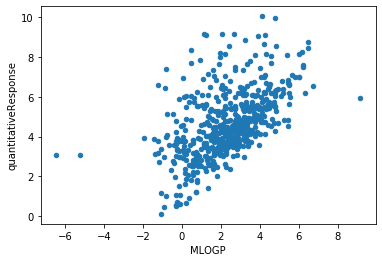

In [107]:
XY.plot.scatter(y = 'quantitativeResponse', x = 'MLOGP')

In [97]:
XY.corr()
# XY.descibe()

,MLOGP,quantitativeResponse
MLOGP,1.000000,0.535512
quantitativeResponse,0.535512,1.000000


In [108]:

model = LinearRegression()

In [99]:
scores = []
kfold = KFold(n_splits = 5, shuffle = True, random_state=42)

In [138]:
X = data.as_matrix(['MLOGP'])

/home/boris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [139]:
model_n = model.fit(X,Y)

In [110]:
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, Y)):
     scores.append(model.score(X, Y))
print(scores)

[0.4861388232902433, 0.4861388232902433, 0.4861388232902433]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

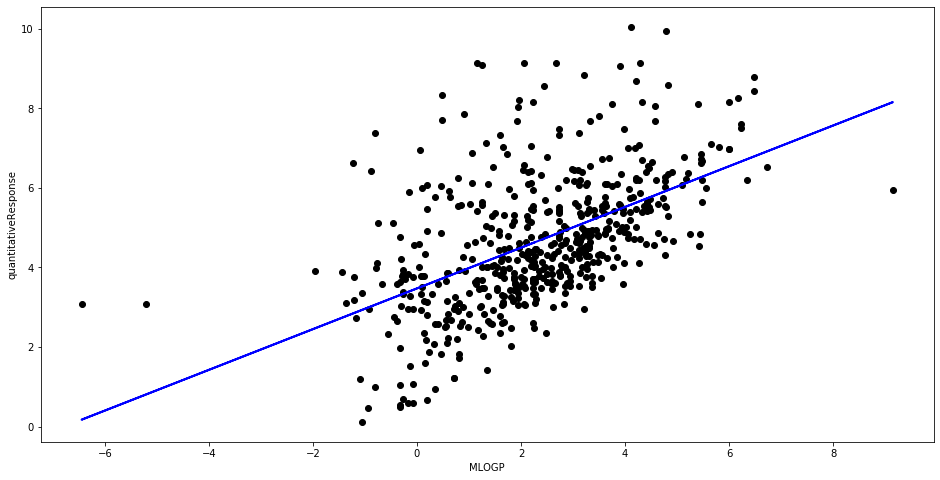

In [141]:
pr = model.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(data['MLOGP'],data['quantitativeResponse'],c='black')
plt.plot(data['MLOGP'],pr,c='blue',linewidth=2)
plt.xlabel("MLOGP")
plt.ylabel("quantitativeResponse")
plt.show()

Concluzie:
    La acesta lucrare de laborator am studia algoritmul de regresie lineara si l-am implimentat asupra setului nostrru de date pe care l-am luat drept testare.
    Dupa analizarea datelor am construit dependenta necesara dintre cimpuri care ar trebuie sa fie pentru prezicerea rezultatelor si am contruit linia de regresie. 